In [2]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [6]:
data = open('C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/aistis1.txt').read()

In [4]:

import os

# Read all poems from the specified folder
folder_path = "C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/"
corpus = ""

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding="utf-8") as file:
            corpus += file.read() + "\n"

tokenizer = Tokenizer()
corpus = corpus.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'ir': 1, 'kaip': 2, 'o': 3, 'į': 4, 'kad': 5, 'tu': 6, 'iš': 7, 'taip': 8, '–': 9, 'tai': 10, 'tik': 11, 'aš': 12, 'ne': 13, 'bet': 14, 'mano': 15, 'man': 16, 'kas': 17, 'ar': 18, 'kur': 19, 'jau': 20, 'lyg': 21, 'ant': 22, 'kai': 23, 'tau': 24, 'su': 25, 'nuo': 26, 'be': 27, 'ten': 28, 'už': 29, 'po': 30, 'jos': 31, 'gal': 32, 'tavo': 33, 'dar': 34, 'per': 35, 'mūsų': 36, 'vis': 37, 'savo': 38, 'vėl': 39, 'nei': 40, 'prie': 41, 'čia': 42, 'mes': 43, 'buvo': 44, 'ji': 45, 'tave': 46, 'jis': 47, 'mane': 48, 'nors': 49, 'jo': 50, 'žemės': 51, 'širdis': 52, 'jų': 53, 'ko': 54, 'širdį': 55, 'naktis': 56, 'ką': 57, 'tą': 58, 'to': 59, 'tartum': 60, 'daug': 61, 'saulė': 62, 'vienas': 63, 'ją': 64, 'akys': 65, 'gi': 66, 'meilės': 67, 'jūs': 68, 'dienos': 69, 'bus': 70, 'mus': 71, 'mums': 72, 'tas': 73, 'tarp': 74, 'vien': 75, 'tiek': 76, 'sau': 77, 'ta': 78, 'tavęs': 79, 'kurs': 80, 'net': 81, 'dėl': 82, 'kiek': 83, 'naktį': 84, 'ak': 85, 'tada': 86, 'tiktai': 87, 'nes': 88, 'nieko': 89, 'vi

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index)

{'ir': 1, 'kaip': 2, 'o': 3, 'į': 4, 'kad': 5, 'tu': 6, 'iš': 7, 'taip': 8, '–': 9, 'tai': 10, 'tik': 11, 'aš': 12, 'ne': 13, 'bet': 14, 'mano': 15, 'man': 16, 'kas': 17, 'ar': 18, 'kur': 19, 'jau': 20, 'lyg': 21, 'ant': 22, 'kai': 23, 'tau': 24, 'su': 25, 'nuo': 26, 'be': 27, 'ten': 28, 'už': 29, 'po': 30, 'jos': 31, 'gal': 32, 'tavo': 33, 'dar': 34, 'per': 35, 'mūsų': 36, 'vis': 37, 'savo': 38, 'vėl': 39, 'nei': 40, 'prie': 41, 'čia': 42, 'mes': 43, 'buvo': 44, 'ji': 45, 'tave': 46, 'jis': 47, 'mane': 48, 'nors': 49, 'jo': 50, 'žemės': 51, 'širdis': 52, 'jų': 53, 'ko': 54, 'širdį': 55, 'naktis': 56, 'ką': 57, 'tą': 58, 'to': 59, 'tartum': 60, 'daug': 61, 'saulė': 62, 'vienas': 63, 'ją': 64, 'akys': 65, 'gi': 66, 'meilės': 67, 'jūs': 68, 'dienos': 69, 'bus': 70, 'mus': 71, 'mums': 72, 'tas': 73, 'tarp': 74, 'vien': 75, 'tiek': 76, 'sau': 77, 'ta': 78, 'tavęs': 79, 'kurs': 80, 'net': 81, 'dėl': 82, 'kiek': 83, 'naktį': 84, 'ak': 85, 'tada': 86, 'tiktai': 87, 'nes': 88, 'nieko': 89, 'vi

In [7]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(total_words, 260, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

c:\Users\josep\anaconda3\envs\erdos_sp_2024\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.0297 - loss: 9.2420
Epoch 2/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.0291 - loss: 9.2675
Epoch 3/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.0519 - loss: 7.5442
Epoch 4/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.1384 - loss: 5.5359
Epoch 5/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.2320 - loss: 4.6672
Epoch 6/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.3020 - loss: 3.9671
Epoch 7/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.3405 - loss: 3.7277
Epoch 8/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.3732 - loss: 3.3618
Epoch 9/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.3986 - loss: 3.1163
Epoch 10/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.4153 - loss: 3.0023
Epoch 11/100
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.4336 - loss: 2.97

In [13]:
# Save the model with a valid filepath extension
tf.keras.models.save_model(model, 'C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/modelly.h5')


In [14]:
# Save the model using the native Keras format
tf.keras.models.save_model(model, 'C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/modelly.keras')


In [15]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
     

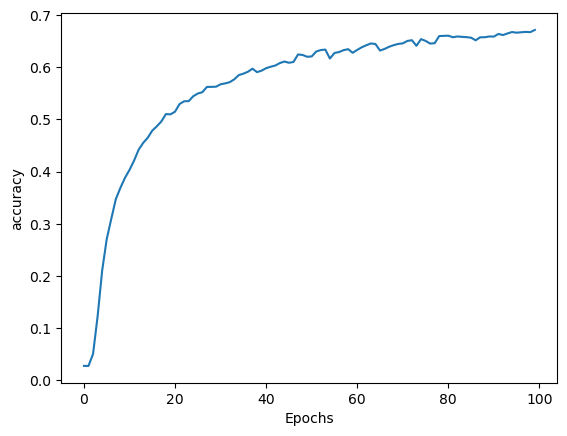

In [16]:

plot_graphs(history, 'accuracy')

In [20]:

seed_text = "viltis tyra "
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
viltis tyra  lietaus numirę duoną ir mokslu šarvuoti mokslu šarvuoti mokslu pagaus skliautus didingus krikštolo diegas šakelių sušvinta skrynias teišspaus inkaru vėjus
